# Visualize Results

## Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from fnmatch import fnmatch
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

## Load Data

In [2]:
def get_sorted_summary_paths(path):
    paths = []
    for path, subdirs, files in os.walk(path):
        for name in files:
            if fnmatch(name, "*.0"):
                paths.append(os.path.join(path, name))
    return paths

In [3]:
summary_paths = get_sorted_summary_paths("./poc_summaries/")
summaries = [EventAccumulator(path) for path in summary_paths]
for i in range(len(summaries)):
    summaries[i].Reload()

## Available data keys

In [4]:
print(summaries[0].scalars.Keys())

['episode/success_percent', 'episode/success_mean', 'episode/reward_mean', 'episode/length_mean', 'losses/loss', 'losses/policy_loss', 'losses/value_loss', 'losses/entropy', 'training/sequence_length', 'training/value_mean', 'training/advantage_mean']


## Convert data to a numpy array

In [5]:
mean_rewards = []
for summary in summaries:
    _, t, v = zip(*summary.Scalars("episode/reward_mean"))
    mean_rewards.append(v)
mean_rewards = np.asarray(mean_rewards, dtype=np.float32)

## Prepare data

In [6]:
mean = np.mean(mean_rewards, axis=0)
std = np.std(mean_rewards, axis=0)

## Plot data

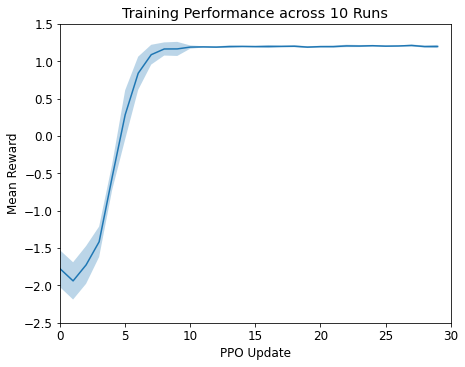

In [7]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.facecolor'] = "white"
plt.rcParams['axes.facecolor'] = "white"
fig, ax = plt.subplots()
fig.set_size_inches(7, 5.5)

ax.plot(t, mean)
ax.fill_between(t, mean + std,  mean - std, alpha=0.3)
ax.set_ylabel("Mean Reward")
ax.set_ylim([-2.5,1.5])
ax.set_xlabel("PPO Update")
ax.set_xlim([0,30])
ax.set_title("Training Performance across 10 Runs")
#plt.savefig("poc.svg")
plt.show()